Universidade Estácio de Sá 

Curso: Desenvolvimento Full Stack

Disciplina: Conhecendo Novos Paradigmas

Turma: 2022.2

Semestre Letivo: 1

Título da Prática: Implementar um programa orientado a objetos para visualizar e aplicar regressão linear em séries temporais.

Objetivo da Prática: Aplicar as técnicas de programação orientará a objetos, manipulação de dicionários e comandos interativos para produção de gráficos no Python e para obter a regressão linear de uma série temporal. Entrar com listas de despesas por dia e o programa deve produzir: gráficos com visualização das séries temporais de despesas; gráfico com a regressão linear da série temporal.

Aluno: Florence Cristina Gonçalves 

LinkedIn: www.linkedin.com/in/florencegoncalves

Classe Pessoa

In [ ]:
class Pessoa:  
    def __init__(self, nome, mes):
        self.set_nome(nome)
        self.set_mes(mes)

    def set_nome(self, nome):
      self.nome=nome

    def set_mes(self, mes):
      self.mes=mes

    def get_nome(self):
      return self.nome
    
    def get_mes(self):
      return self.mes
   
      

      



Objeto Pessoa

In [ ]:
pessoa1 = Pessoa("maria", "Despesas dos meses de maio, junho e julho de 2022")


Imprimir dados da pessoa

In [ ]:
imprimir= lambda pessoa: print(f'Nome: {pessoa.get_nome()}, mês: {pessoa.get_mes()}')

Classe de Gráficos

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px



class Grafico:  
  def __init__(self, lista_despesas):
    self.lista_despesas=lista_despesas
    self.imprimir_graficos()

  def padrao_do_grafico(self):
    plt.xlabel('Dia')
    plt.ylabel('despesas em reais(m)')
    plt.title('Gráficos de despesas')    

  def imprimir_graficos(self):
    self.padrao_do_grafico()
    for despesa in self.lista_despesas:
      mLista = despesa.dicionario.items()
      cor = despesa.cor
      nome = despesa.nome
      x, y = zip(*mLista)
      plt.plot(x, y, label = nome, marker='o', 
               markerfacecolor='blue', 
               markersize=12, 
               color=cor, 
               linewidth=4)
    
    plt.legend()
    plt.show()

  def regressao_linear(self, id_grafico):
    despesa = self.lista_despesas[id_grafico]
    mLista = despesa.dicionario.items()    
    cor = despesa.cor
    nome = despesa.nome
    dias, valores = zip(*mLista)
    dias = np.array(dias)
    valores = np.array(valores)
    dias = dias.reshape(-1, 1)
    valores = valores.reshape(-1, 1)
    regr = LinearRegression()
    regr.fit(X=dias, y=valores)
    plt.plot(dias, regr.predict(dias), 
             color='blue',
             label = "Regressão Linear")

    x, y = zip(*mLista)
    plt.plot(x, y, label = nome+str(" - original"), 
             marker='o', 
             markerfacecolor='olive', 
             markersize=12, 
             color=cor, 
             linewidth=4)

    plt.legend()
    plt.show()

plt.figure(figsize=(4,2))



<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

Classe de Despesas

In [ ]:
class Despesa:
    def __init__(self, dicionario, cor, nome):
        self.dicionario = dicionario
        self.cor=cor
        self.nome = nome

Chamadas

In [ ]:
maio = Despesa({1:1000,5:1000,7:1500,17:1500,20:1700,29:2000},'skyblue','maio')
junho = Despesa({1:1000,3:1000,5:1500,7:1500,15:1500,20:1700,27:2000},'red','junho')
julho = Despesa({1:1000,3:1000,5:1500,7:1500,10:2000,15:2000,20:2700,27:2500},'olive','julho')
lista_despesas = [maio,junho,julho]

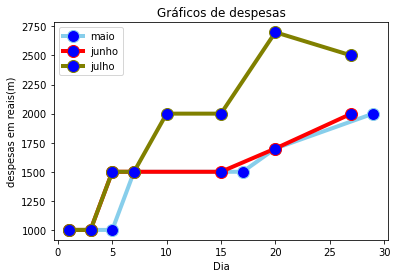

In [ ]:
grafico = Grafico(lista_despesas)


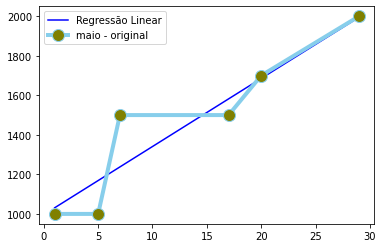

In [ ]:
id_mes = 0 #mês de maio
grafico.regressao_linear(id_mes)

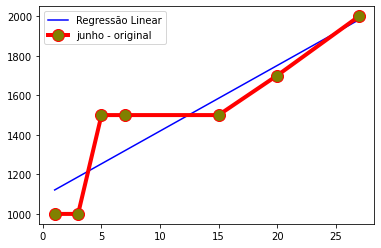

In [ ]:
id_mes = 1 #mês de junho
grafico.regressao_linear(id_mes)

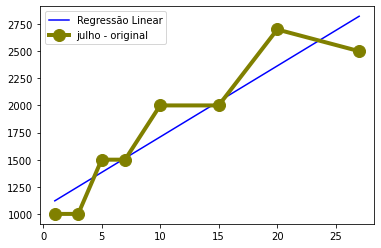

In [ ]:
id_mes = 2 #mês de julho
grafico.regressao_linear(id_mes)